In [1]:
import Modules.SQcircuit_extensions as sq_ext
import Modules.figures as figs
import SQcircuit as sq
import numpy as np
import matplotlib.pyplot as plt
import importlib
from scipy.linalg import eigh
import qutip as qt
import sympy as sym

%matplotlib ipympl
plt.rcParams['text.usetex'] = False
importlib.reload(sq_ext)
importlib.reload(sq)
importlib.reload(figs)
np.set_printoptions(linewidth=300, formatter={'float': '{:.12f}'.format})
GHz = 1e9

|# Comparison of sqcircuit, numeric and spin-boson models vs truncation

In [2]:
Δ = 0.1
n_eig = 3
nmax_r_values = np.array([4,5,5,6,6 ,7 ,7 ,8 ,8 ,9 ])
nmax_f_values = np.array([6,6,8,8,10,10,12,12,14,14])

E_sq = []
E_n  = []
E_sb = []

for nmax_r, nmax_f in zip(nmax_r_values, nmax_f_values):
    print(nmax_f)
    
    fluxonium = sq_ext.KIT_fluxonium(Δ =Δ, trunc_res=nmax_r,trunc_flux=nmax_f)
    resonator = sq_ext.KIT_resonator(Δ =Δ, trunc_res=nmax_r,trunc_flux=nmax_f)
    H_n = sq_ext.hamiltonian_frc(fluxonium, resonator, Δ=Δ)
    E = sq_ext.diag(H_n, n_eig, out='GHz')[0]
    E_n.append(E-E[0])
    del(H_n)

    H_sb = sq_ext.spin_boson_qubit(nmax_r=nmax_r, nmax_f=nmax_f, Δ=Δ, N_R=2)
    E = eigh(H_sb, eigvals_only=True)
    E_sb.append(E-E[0])
    del(H_sb)
    
    H_sq = sq_ext.KIT_qubit(Δ = Δ, trunc_res=nmax_r, trunc_flux=nmax_f)
    H_sq.diag(n_eig)
    E_sq.append(H_sq.efreqs-H_sq.efreqs[0])
    del(H_sq)
    
E_sq = np.array(E_sq )
E_n  = np.array(E_n  )
E_sb = np.array(E_sb )   

6
6
8
8
10
10
12
12
14
14


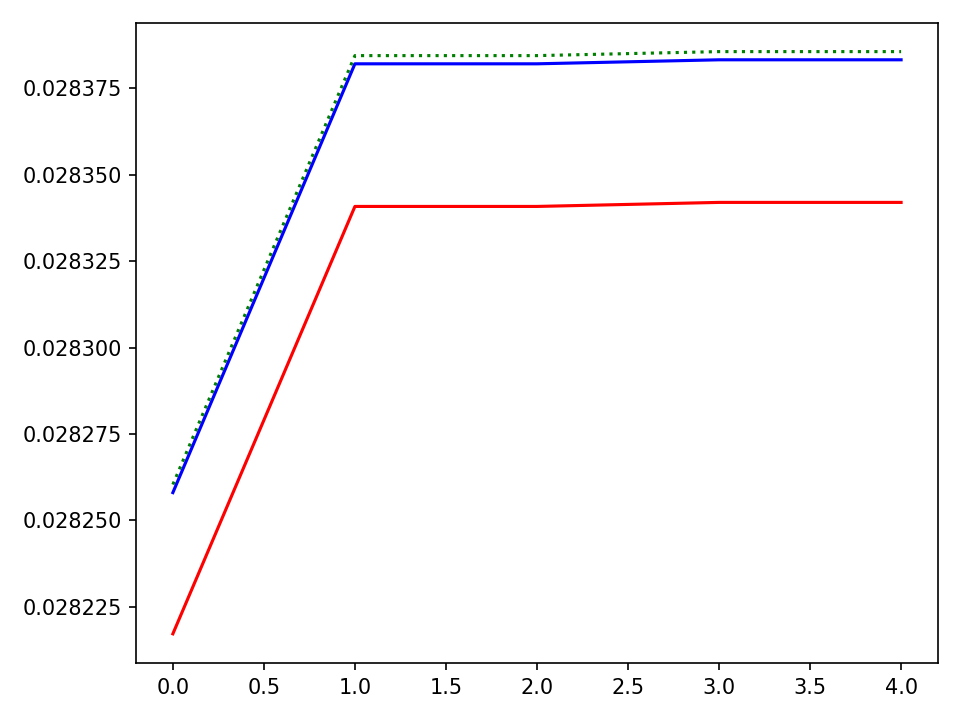

In [3]:
fig,  ax   = plt.subplots( dpi =150)

ax.plot(E_sq[5:, 1]-E_sq[0, 1], 'r' )
ax.plot(E_n [5:, 1]-E_n [0, 1], ':g')
ax.plot(E_sb[5:, 1]-E_sb[0, 1], 'b' )
    
fig.tight_layout()
fig.show()

In [16]:
importlib.reload(sq_ext)
Δ_values = np.geomspace(1e-4, 100, 30)
n_eig = 3
nmax_r = 10
nmax_f = 15

E_sq = []
E_n  = []
E_sb = []

# Δ_dependance = 'not in energies'
Δ_dependance = 'not in coupling'
# Δ_dependance = 'all'
Lq  = 25
Lr  = 10

for Δ in Δ_values:
    
    if Δ_dependance == 'all':
        # Original Lq and Lr, everything depends on Δ
        Lq_prime  = Lq
        Lr_prime  = Lr
    elif Δ_dependance == 'not in energies':
        # Lr and Lq such that ωr and ωf !=f(Δ) and hence there is no renormalization
        Lq_prime  = (Lq*(Lq + 4*Lr) + np.sqrt(Lq*(Lq + 4*Lr)*(Lq**2 + 4*Lq*Lr + 16*Δ**2)))/(2*(Lq + 4*Lr))
        Lr_prime  = Lr*(Lq*(Lq + 4*Lr) + np.sqrt(Lq*(Lq + 4*Lr)*(Lq**2 + 4*Lq*Lr + 16*Δ**2)))/(2*Lq*(Lq + 4*Lr))
    elif Δ_dependance == 'not in coupling':
        # Lr and Lq such that L^2 !=f(Δ) and hence the coupling inductance does not depend on delta
        Lq_prime = np.sqrt(Δ)*Lq
        Lr_prime = np.sqrt(Δ)*Lr + Δ **2 /(Lq*np.sqrt(Δ))
    
    fluxonium = sq_ext.KIT_fluxonium(Δ=Δ, Lq=Lq_prime, Lr=Lr_prime, trunc_res=nmax_r,trunc_flux=nmax_f)
    resonator = sq_ext.KIT_resonator(Δ=Δ, Lq=Lq_prime, Lr=Lr_prime, trunc_res=nmax_r,trunc_flux=nmax_f)
    H_n = sq_ext.hamiltonian_frc(fluxonium, resonator, Δ=Δ,  Lq=Lq_prime, Lr=Lr_prime, interaction_prefactor=1)
    E = sq_ext.diag(H_n, n_eig, out='GHz')[0]
    E_n.append(E-E[0])
    del(H_n)

    H_sb = sq_ext.spin_boson_qubit(nmax_r=nmax_r, nmax_f=nmax_f, Δ=Δ, N_R=2,  Lq=Lq_prime, Lr=Lr_prime, interaction_prefactor=1)
    E = eigh(H_sb, eigvals_only=True)
    E_sb.append(E-E[0])
    del(H_sb)
    
    H_sq = sq_ext.KIT_qubit(Δ = Δ,  Lq=Lq_prime, Lr=Lr_prime, trunc_res=nmax_r, trunc_flux=nmax_f)
    H_sq.diag(n_eig)
    E_sq.append(H_sq.efreqs-H_sq.efreqs[0])
    del(H_sq)
    
E_sq = np.array(E_sq)
E_n  = np.array(E_n )
E_sb = np.array(E_sb)   

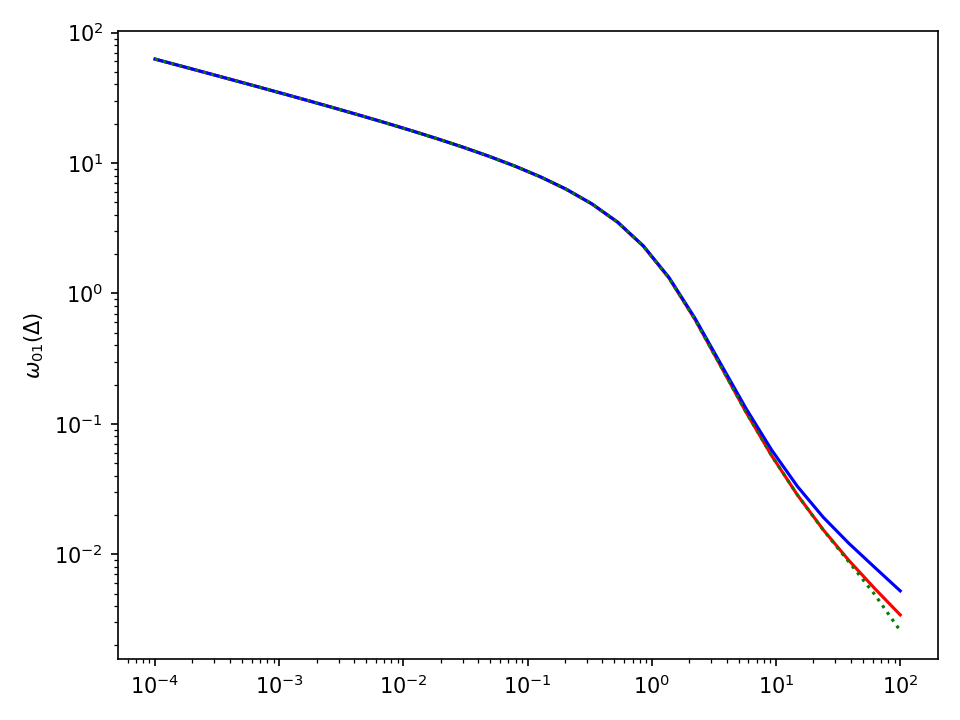

In [17]:
fig,  ax   = plt.subplots( dpi =150)
ω_01_sq = np.abs(E_sq[:, 1]-E_sq[:, 0])
ax.plot(Δ_values, np.abs(E_sq[:, 1] - E_sq[:, 0]), 'r')
ax.plot(Δ_values, np.abs(E_sb[:, 1] - E_sb[:, 0]), 'b')
ax.plot(Δ_values, np.abs(E_n [:, 1] - E_n [:, 0]), ':g')
# ax.plot(Δ_values, np.abs(E_n [:, 1]-E_n [:, 0] - ω_01_sq ) , ':g')
ax.set_ylabel(r'$\omega_{01}(\Delta)$')
ax.set_xscale('log')
ax.set_yscale('log')
    
fig.tight_layout()
fig.show()
plt.close('all')

In [63]:
flux_0 = sq_ext.KIT_fluxonium(Δ=0,trunc_flux=35)
flux   = sq_ext.KIT_fluxonium(Δ=10,trunc_flux=35)

In [64]:
sq_ext.H_eff_SWT(flux_0.hamiltonian(),flux.flux_op(0),2)

array([[-0.000000034522, -0.000000001176],
       [-0.000000001176, -0.000000032226]])

In [65]:
sq_ext.H_eff_SWT(flux.hamiltonian(),flux.flux_op(0),2)

array([[-0.000000034768, -0.000000000870],
       [-0.000000000870, -0.000000031979]])

In [68]:
flux.diag(2)
flux.flux_op(0, basis='eig')/2/np.pi/GHz

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.000000000000 0.000000004827]
 [0.000000004827 0.000000000000]]

In [69]:
sq_ext.H_eff_p1(flux.hamiltonian(),flux.flux_op(0),2) 

array([[0.000000000000, 0.000000004827],
       [0.000000004827, -0.000000000000]])

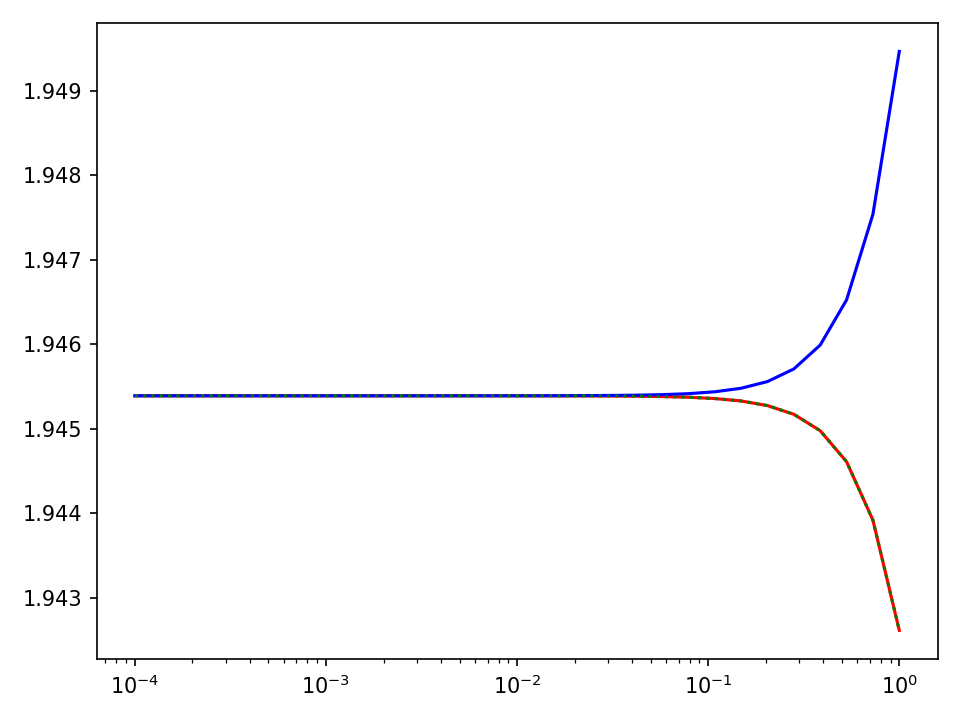

In [4]:
fig,  ax   = plt.subplots( dpi =150)

ax.plot(Δ_values, E_sq[:, 1], 'r' )
ax.plot(Δ_values, E_sb[:, 1], 'b' )
ax.plot(Δ_values, E_n [:, 1], ':g')
ax.set_xscale('log')
# ax.set_yscale('log')
    
fig.tight_layout()
fig.show()

In [47]:
importlib.reload(sq_ext)
Δ = 0.1
param_values = np.geomspace(1, 100, 50)
n_eig = 3
nmax_r = 10
nmax_f = 15

E_sq = []
E_n  = []
E_sb = []

for Lq in param_values:
    fluxonium = sq_ext.KIT_fluxonium(Lq=Lq, trunc_res=nmax_r,trunc_flux=nmax_f)
    resonator = sq_ext.KIT_resonator(Lq=Lq, trunc_res=nmax_r,trunc_flux=nmax_f)
    H_n = sq_ext.hamiltonian_frc(fluxonium, resonator, Δ=Δ, Lq=Lq)
    E = sq_ext.diag(H_n, n_eig, out='GHz')[0]
    E_n.append(E-E[0])
    del(H_n)

    H_sb = sq_ext.spin_boson_qubit(nmax_r=nmax_r, nmax_f=nmax_f, Lq=Lq, N_R=2)
    E = eigh(H_sb, eigvals_only=True)
    E_sb.append(E-E[0])
    del(H_sb)
    
    H_sq = sq_ext.KIT_qubit(Lq=Lq, trunc_res=nmax_r, trunc_flux=nmax_f)
    H_sq.diag(n_eig)
    E_sq.append(H_sq.efreqs-H_sq.efreqs[0])
    del(H_sq)
    
E_sq = np.array(E_sq )
E_n  = np.array(E_n  )
E_sb = np.array(E_sb )   

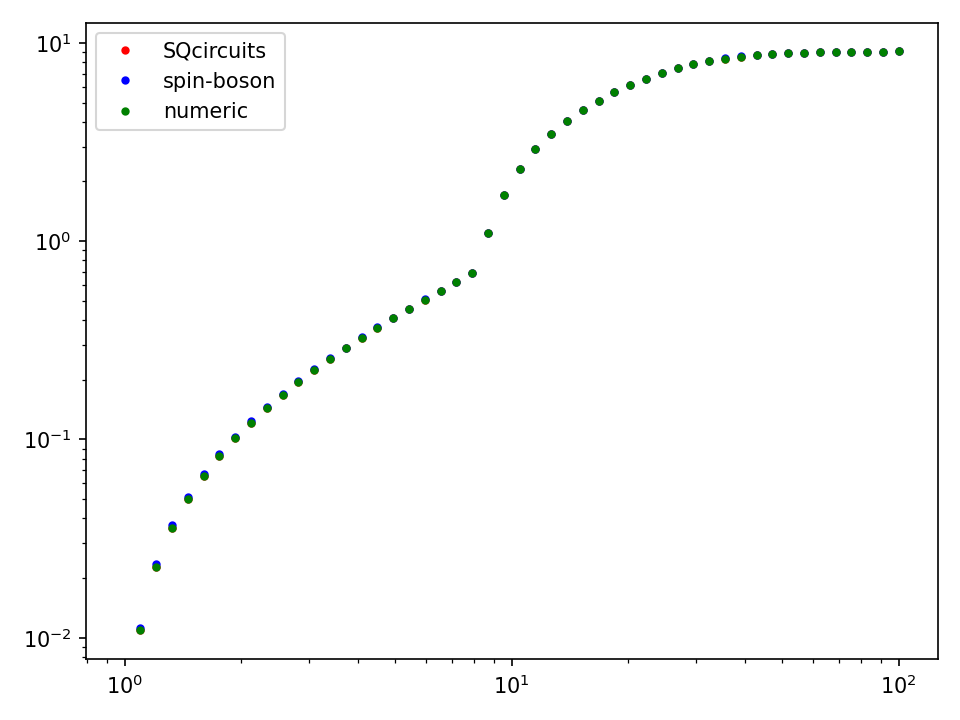

In [48]:
fig,  ax   = plt.subplots( dpi =150)

ax.plot(param_values, np.abs(E_sq[:, 1]-E_sq[0, 1]), '.r', label='SQcircuits' )
ax.plot(param_values, np.abs(E_sb[:, 1]-E_sb[0, 1]), '.b', label='spin-boson' )
ax.plot(param_values, np.abs(E_n [:, 1]-E_n [0, 1]), '.g', label='numeric'    )
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()    
fig.tight_layout()
fig.show()

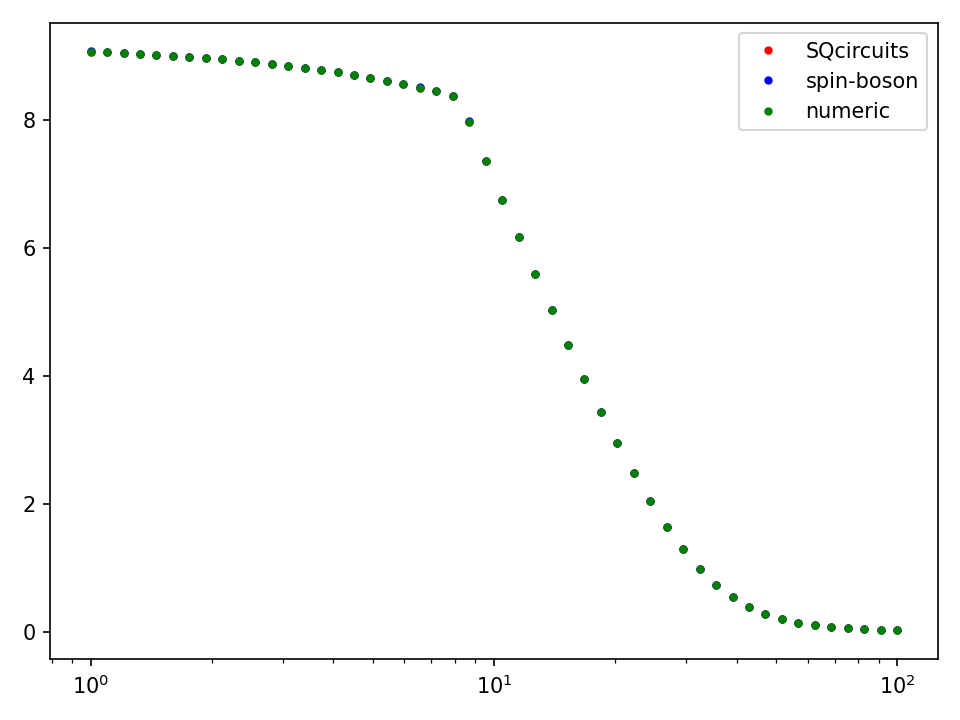

In [51]:
fig,  ax   = plt.subplots( dpi =150)

ax.plot(param_values, E_sq[:, 1], '.r', label='SQcircuits' )
ax.plot(param_values, E_sb[:, 1], '.b', label='spin-boson' )
ax.plot(param_values, E_n [:, 1], '.g', label='numeric'    )
ax.set_xscale('log')
ax.legend()    
# ax.set_yscale('log')
    
fig.tight_layout()
fig.show()

In [33]:
plt.close('all')